In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xg
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",50)

In [3]:
df=pd.read_csv(r"C:\Users\lenovo\Downloads\Assessment-July 2023\Assessment-July 2023\NeoStats - Assessment\Dataset 2.csv")
df

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
0,1,<0,19.0,critical/other existing credit,business,640.0,<100,unemployed,1,male div/sep,co applicant,1,life insurance,22,stores,for free,110,unemp/unskilled non res,9.0,yes,no,3463,bad
1,2,<0,60.0,existing paid,business,903.0,<100,1<=X<4,2,male div/sep,co applicant,2,real estate,25,bank,for free,400,unemp/unskilled non res,3.0,none,yes,1048,good
2,3,<0,72.0,critical/other existing credit,business,523.0,<100,1<=X<4,2,male div/sep,co applicant,2,life insurance,24,bank,for free,190,unemp/unskilled non res,13.0,none,no,357,bad
3,4,<0,NaN,existing paid,business,605.0,<100,4<=X<7,2,male div/sep,co applicant,4,life insurance,30,none,for free,320,skilled,1.0,none,yes,1296,bad
4,5,<0,67.0,delayed previously,business,709.0,<100,1<=X<4,2,male div/sep,co applicant,3,no known property,30,stores,for free,170,unskilled resident,4.0,yes,no,1015,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,5046,no checking,17.0,all paid,used car,656.0,no known savings,<1,4,male single,none,1,life insurance,47,none,rent,260,unemp/unskilled non res,2.0,none,no,502,good
5046,5047,no checking,42.0,all paid,used car,1618.0,500<=X<1000,unemployed,4,male div/sep,none,2,real estate,40,stores,rent,330,skilled,5.0,yes,no,1747,good
5047,5048,no checking,42.0,critical/other existing credit,used car,17037.0,500<=X<1000,4<=X<7,1,male single,none,4,no known property,45,none,NaN,450,unskilled resident,14.0,yes,no,3386,good
5048,5049,no checking,14.0,no credits/all paid,used car,15007.0,<100,1<=X<4,2,male single,none,2,no known property,25,bank,rent,290,unemp/unskilled non res,5.0,yes,no,3570,good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_id             5050 non-null   int64  
 1   checking_status         5050 non-null   object 
 2   duration                5048 non-null   float64
 3   credit_history          5050 non-null   object 
 4   purpose                 5050 non-null   object 
 5   credit_amount           5048 non-null   float64
 6   savings_status          5045 non-null   object 
 7   employment              5049 non-null   object 
 8   installment_commitment  5050 non-null   int64  
 9   personal_status         5050 non-null   object 
 10  other_parties           5050 non-null   object 
 11  residence_since         5050 non-null   int64  
 12  property_magnitude      5049 non-null   object 
 13  age                     5050 non-null   int64  
 14  other_payment_plans     5050 non-null   

# Missing values in given Dataset

In [14]:
null=(df.isnull().sum()/len(df))*100
null

Customer_id               0.000000
checking_status           0.000000
duration                  0.039604
credit_history            0.000000
purpose                   0.000000
credit_amount             0.039604
savings_status            0.099010
employment                0.019802
installment_commitment    0.000000
personal_status           0.000000
other_parties             0.000000
residence_since           0.000000
property_magnitude        0.019802
age                       0.000000
other_payment_plans       0.000000
housing                   0.158416
bureau_score              0.000000
job                       0.000000
num_dependents            0.138614
own_telephone             0.000000
foreign_worker            0.000000
Spend_debit_card          0.000000
class                     0.000000
dtype: float64

In [5]:
null_features = []
not_null_features = []

for i in df.columns:
    if df[i].isnull().any():
        null_features.append(i)
    else:
        not_null_features.append(i)
print(f"null features:{null_features}")
print(f"not_null features:{not_null_features}")

null features:['duration', 'credit_amount', 'savings_status', 'employment', 'property_magnitude', 'housing', 'num_dependents']
not_null features:['Customer_id', 'checking_status', 'credit_history', 'purpose', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'age', 'other_payment_plans', 'bureau_score', 'job', 'own_telephone', 'foreign_worker', 'Spend_debit_card', 'class']


- As we can see very small percentage of null values in features num_dependents,housing,property_magnitude,credit_amount,savings_status,employment,duration.

# Check for duplicate rows

In [6]:
df[df.duplicated()]

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class


### There are no duplicate rows in given dataset

### Replace the null values in features based on their distribution

In [11]:
null_df=df[null_features]
null_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration            5048 non-null   float64
 1   credit_amount       5048 non-null   float64
 2   savings_status      5045 non-null   object 
 3   employment          5049 non-null   object 
 4   property_magnitude  5049 non-null   object 
 5   housing             5042 non-null   object 
 6   num_dependents      5043 non-null   float64
dtypes: float64(3), object(4)
memory usage: 276.3+ KB


In [15]:
null_df

,duration,credit_amount,savings_status,employment,property_magnitude,housing,num_dependents
0,19.0,640.0,<100,unemployed,life insurance,for free,9.0
1,60.0,903.0,<100,1<=X<4,real estate,for free,3.0
2,72.0,523.0,<100,1<=X<4,life insurance,for free,13.0
3,NaN,605.0,<100,4<=X<7,life insurance,for free,1.0
4,67.0,709.0,<100,1<=X<4,no known property,for free,4.0
...,...,...,...,...,...,...,...
5045,17.0,656.0,no known savings,<1,life insurance,rent,2.0
5046,42.0,1618.0,500<=X<1000,unemployed,real estate,rent,5.0
5047,42.0,17037.0,500<=X<1000,4<=X<7,no known property,NaN,14.0
5048,14.0,15007.0,<100,1<=X<4,no known property,rent,5.0


# Check for distribution of null features 

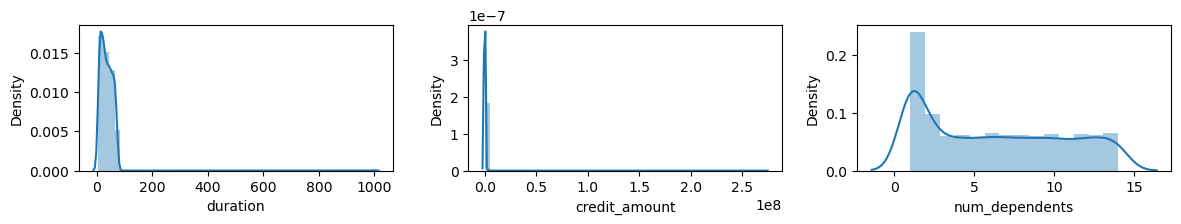

In [14]:
fig=plt.figure(figsize=(12,6))
count=1
for i,j in enumerate(null_df.select_dtypes('number').columns):
    plt.subplots_adjust(left=0.75,bottom=0.75,right=2,top=2, wspace=0.1,hspace=0.1)
    fig,plt.subplot(3,3,count)
    sns.distplot(df[j])
    count+=1
plt.tight_layout()
plt.show()

# Check for outliers in null features

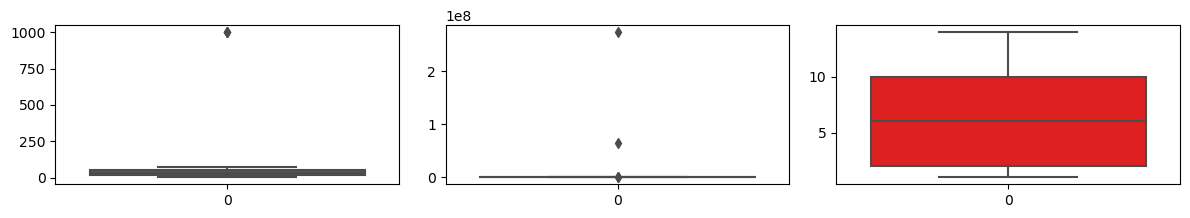

In [17]:
fig=plt.figure(figsize=(12,6))
count=1
for i,j in enumerate(null_df.select_dtypes('number').columns):
    plt.subplots_adjust(left=0.75,bottom=0.75,right=2,top=2, wspace=0.1,hspace=0.1)
    fig,plt.subplot(3,3,count)
    sns.boxplot(df[j],color='red')
    count+=1
plt.tight_layout()
plt.show()

- Most of the features duration,credit_amount,num_dependents are rightly skewed so better we replace with median values,because the median is not affected by the outliers

# Replace the null values with median

In [18]:
df['duration'].fillna(df['duration'].median(), inplace=True)
df['credit_amount'].fillna(df['credit_amount'].median(), inplace=True)
df['num_dependents'].fillna(df['num_dependents'].median(), inplace=True)

# Replace the null values in categorical features 

In [19]:
df['savings_status'].value_counts()

<100                1787
500<=X<1000         1357
100<=X<500           838
>=1000               711
no known savings     352
Name: savings_status, dtype: int64

In [22]:
df['employment'].value_counts()

1<=X<4        1169
>=7           1072
<1            1023
4<=X<7         929
unemployed     856
Name: employment, dtype: int64

In [23]:
df['property_magnitude'].value_counts()

car                  1349
real estate          1341
life insurance       1215
no known property    1144
Name: property_magnitude, dtype: int64

In [24]:
df['housing'].value_counts()

own         2025
rent        1574
for free    1443
Name: housing, dtype: int64

# Replace the null values in categorical values with mode 

In [25]:
df['savings_status'].fillna(df['savings_status'].mode()[0], inplace=True)
df['employment'].fillna(df['employment'].mode()[0], inplace=True)
df['property_magnitude'].fillna(df['property_magnitude'].mode()[0], inplace=True)
df['housing'].fillna(df['housing'].mode()[0], inplace=True)

# cross check  if there is any null values 

In [27]:
df.isnull().sum()

Customer_id               0
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
bureau_score              0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
dtype: int64

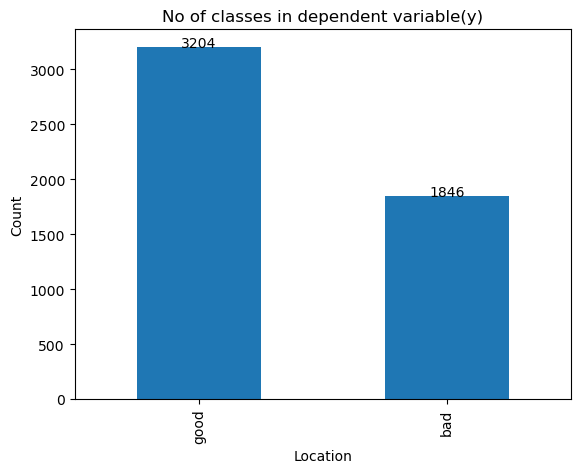

In [28]:
df['class'].value_counts().plot(kind='bar')
plt.title('No of classes in dependent variable(y)')
plt.xlabel('Location')
plt.ylabel('Count')

for i,j in enumerate(df['class'].value_counts()):
    plt.text(i,j,str(j),ha='center')

- The output class is imbalanced in this scenario. The output class has two categories: "good" and "bad." The count of samples in each category is as follows:

- "good": 3204 samples
- "bad": 1846 samples
- An imbalanced class distribution occurs when the number of samples in one category is significantly higher or lower than the number of samples in the other category. In this case, the "good" category has substantially more samples (3204) compared to the "bad" category (1846).

# Examining the each features

In [32]:
df.drop(columns=['Customer_id'],inplace=True)

In [33]:
numerical_features=df.select_dtypes('number').columns
numerical_features

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'bureau_score', 'num_dependents',
       'Spend_debit_card'],
      dtype='object')

In [34]:
df[numerical_features].describe()

,duration,credit_amount,installment_commitment,residence_since,age,bureau_score,num_dependents,Spend_debit_card
count,5050.000000,5.050000e+03,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,35.364158,7.291841e+04,3.026139,2.549505,44.893267,200.471287,6.243762,2507.577624
std,30.748745,3.942311e+06,18.024623,1.119351,16.725905,155.330759,4.424068,1462.481192
min,4.000000,2.500000e+02,1.000000,1.000000,19.000000,10.000000,1.000000,-50.000000
25%,18.000000,9.582500e+02,2.000000,2.000000,30.000000,40.000000,2.000000,1225.000000
50%,33.000000,4.297000e+03,3.000000,3.000000,43.000000,190.000000,6.000000,2532.500000
75%,51.000000,1.087500e+04,4.000000,4.000000,59.000000,340.000000,10.000000,3762.750000
max,999.000000,2.728040e+08,772.000000,4.000000,200.000000,480.000000,14.000000,5000.000000


- Based on the descriptive statistics:

- 1. duration:
   - The mean duration of credit is approximately 35.36 months.
   - The minimum duration is 4 months, and the maximum duration is 999 months.
   - The standard deviation is relatively high at 30.75, indicating a wide range of durations.
   - The duration of credit ranges from 4 to 999 months with a mean of approximately 35.36 months.
   - The data seems to be positively skewed, as the mean is less than the median (33 months).
   - The standard deviation of 30.75 suggests significant variability in the duration of credits.
   - There might be some extreme outliers, as indicated by the large maximum value.

- 2. credit_amount:
   - The mean credit amount is approximately 72918.41.
   - The credit amounts vary widely, with a standard deviation of 3942311.
   - The minimum credit amount is 250, and the maximum credit amount is 272804000.
   - The credit amount ranges from 250 to 272,804,000 with a mean of approximately 72,918.41.
   - The data has an extremely high standard deviation of 3,942,311, indicating substantial variability and potential presence of outliers.
   - The distribution of credit amounts is likely heavily right-skewed, as the mean is significantly greater than the median (4,297).

- 3. installment_commitment:
   - The mean installment commitment is approximately 3.03.
   - The values of installment commitment seem to have a relatively high standard deviation of 18.02.

- 4. residence_since:
   - The mean residence duration is approximately 2.55.
   - The residence_since feature appears to be a categorical variable with values ranging from 1 to 4.

- 5. age:
   - The mean age of applicants is approximately 44.89 years.
   - The minimum age is 19 years, and the maximum age is 200 years.

- 6. bureau_score:
   - The mean bureau score is approximately 200.47.
   - The bureau scores range from 10 to 480, indicating a wide range of creditworthiness.

- 7. num_dependents:
   - The mean number of dependents is approximately 6.24.
   - The number of dependents ranges from 1 to 14.

- 8. Spend_debit_card:
   - The mean spending using a debit card is approximately 2507.58.
   - The spending values appear to have a relatively high standard deviation of 1462.48.
   - The minimum spending value is -50, which might be worth investigating as it is an unexpected negative value.

# Distribution of numerical features

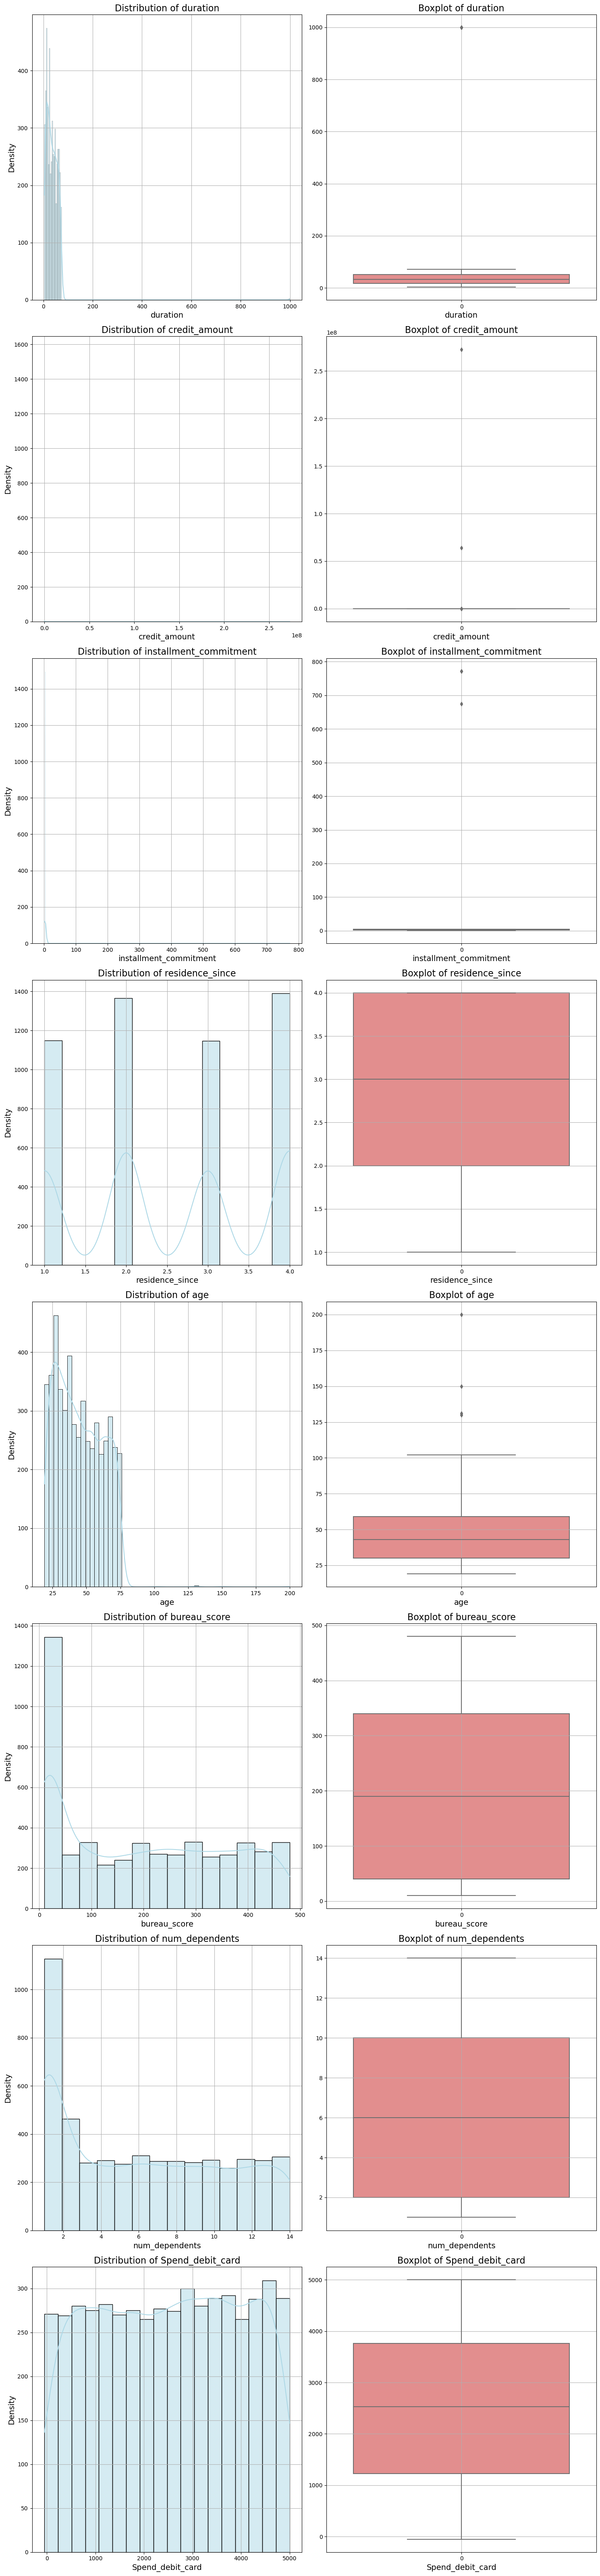

In [43]:
fig, ax = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15,64))

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=ax[i][0], color='lightblue', edgecolor='k')
    sns.boxplot(df[col], ax=ax[i][1], color='lightcoral')
    # histogram
    ax[i][0].set_title(f'Distribution of {col}', fontsize=16)
    ax[i][0].set_xlabel(col, fontsize=14)
    ax[i][0].set_ylabel('Density', fontsize=14)
    ax[i][0].grid(True)
    # Boxplot
    ax[i][1].set_title(f'Boxplot of {col}', fontsize=16)
    ax[i][1].set_xlabel(col, fontsize=14)
    ax[i][1].grid(True)

plt.tight_layout()
plt.show()

- Most of numerical features are positively skewed 
- Features such as duration,credit amount,installment commitment,residence since,age has outliers which can be conclude by boxplot and descritive statistics

# Examining the categorical features

In [45]:
categorical_features=df.select_dtypes('object').columns
categorical_features

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

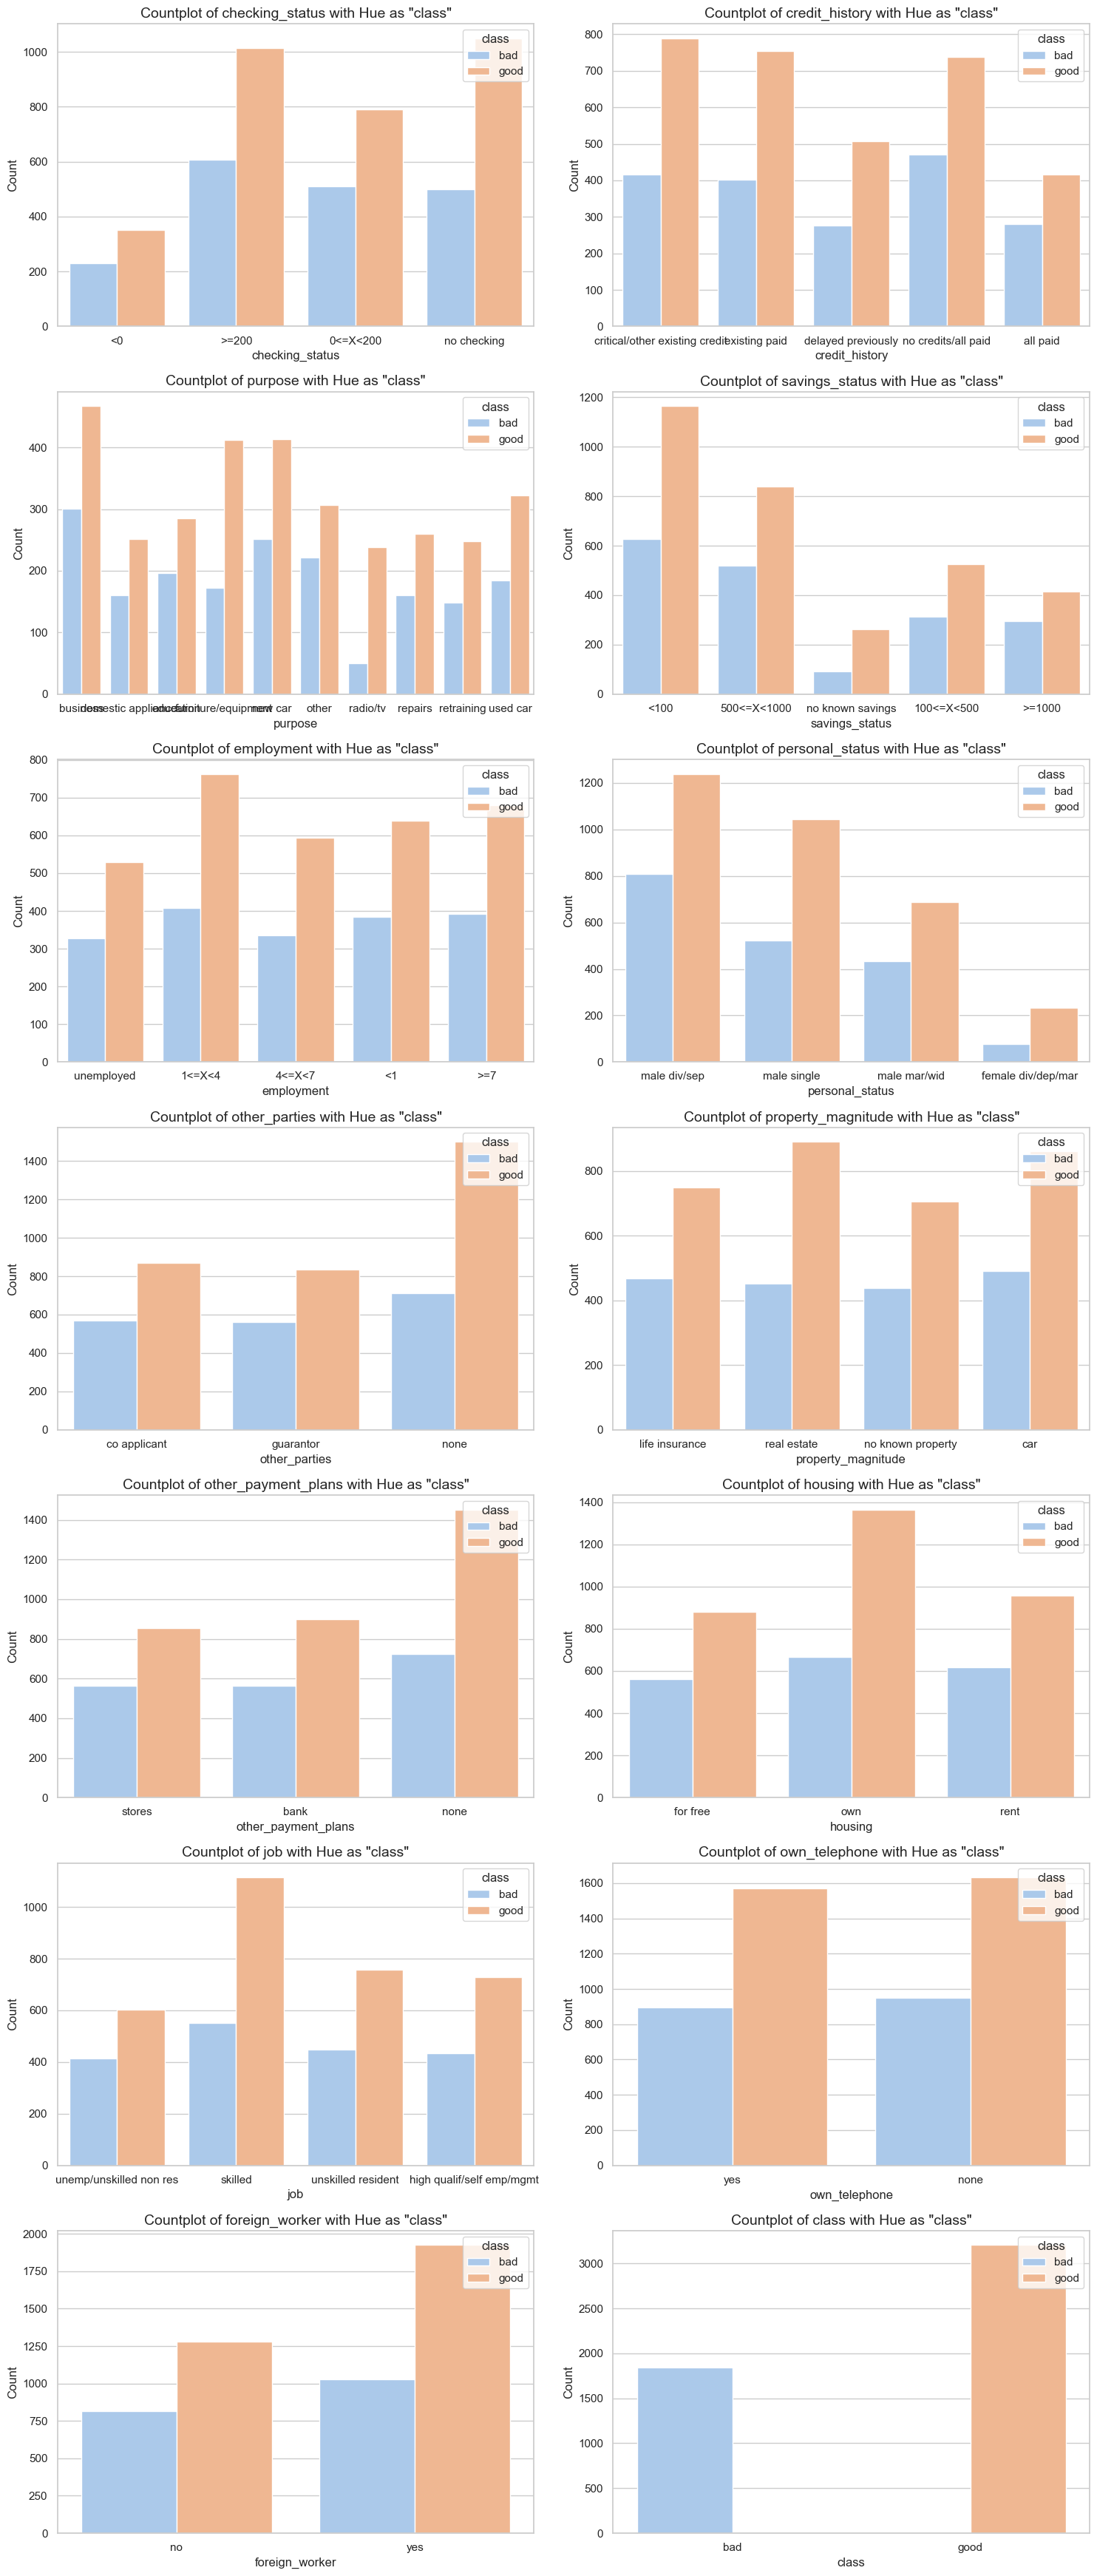

In [46]:
num_features = len(categorical_features)
num_rows = (num_features + 1) // 2 
plt.figure(figsize=(15, 5 * num_rows))
sns.set(style="whitegrid")

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(data=df, x=feature, hue='class', palette='pastel')
    plt.title(f'Countplot of {feature} with Hue as "class"', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='class', loc='upper right', labels=['bad', 'good'])

plt.tight_layout()
plt.show()


- 1. Checking_account: Customers maintaining 0 <= X < 200 and >= 200 in their checking accounts tend to be profitable credit card holders for the bank. This suggests that individuals with higher checking account balances are more likely to be creditworthy and financially stable.

- 2. Credit_history: Customers with no credits, all paid, and existing paid credit history tend to be good customers, indicating a positive credit repayment behavior. On the other hand, customers with critical/other existing credit and delayed payments are non-profitable customers, as they might have a higher risk of defaulting.

- 3. Purpose: Customers taking credit for business, furniture/equipment, and new cars tend to be profitable customers. However, those taking loans for radio/tv purposes are less profitable, while customers with other purposes fall in the moderate profitability category.

- 4. Saving_status: Customers with savings < 100 and 100 < x < 500 tend to be profitable for the bank. Conversely, customers with no savings status are non-profitable, suggesting that having some savings correlates with better creditworthiness.

- 5. Employment: Salaried customers with experience between 1 < x < 7 years tend to be the most profitable, as they are more likely to make timely installment payments. Unemployed customers are less profitable, indicating that steady employment is a crucial factor in creditworthiness.

- 6. Personal_status: Male customers who are separated, divorced, or single tend to be profitable for the bank. In contrast, female customers are less profitable. This suggests a gender-based disparity in creditworthiness.

- 7. Property_magnitude: Customers with life insurance, car ownership, and involvement in real estate business are most profitable. Conversely, customers with no property have the lowest profitability, implying that owning valuable assets is associated with creditworthiness.

- 8. Housing: Customers living in their own houses are more profitable for the bank. Customers living in rented or free accommodation are less profitable, indicating that homeownership is positively correlated with creditworthiness.

- 9. Job: Skilled workers tend to be the most profitable customers, whereas unskilled laborers are the least profitable. This suggests that customers with stable and well-paying jobs are more creditworthy.

- 10. Foreign_worker: Customers working in foreign countries are the most profitable for the bank. This may indicate that working abroad provides better financial stability and creditworthiness.

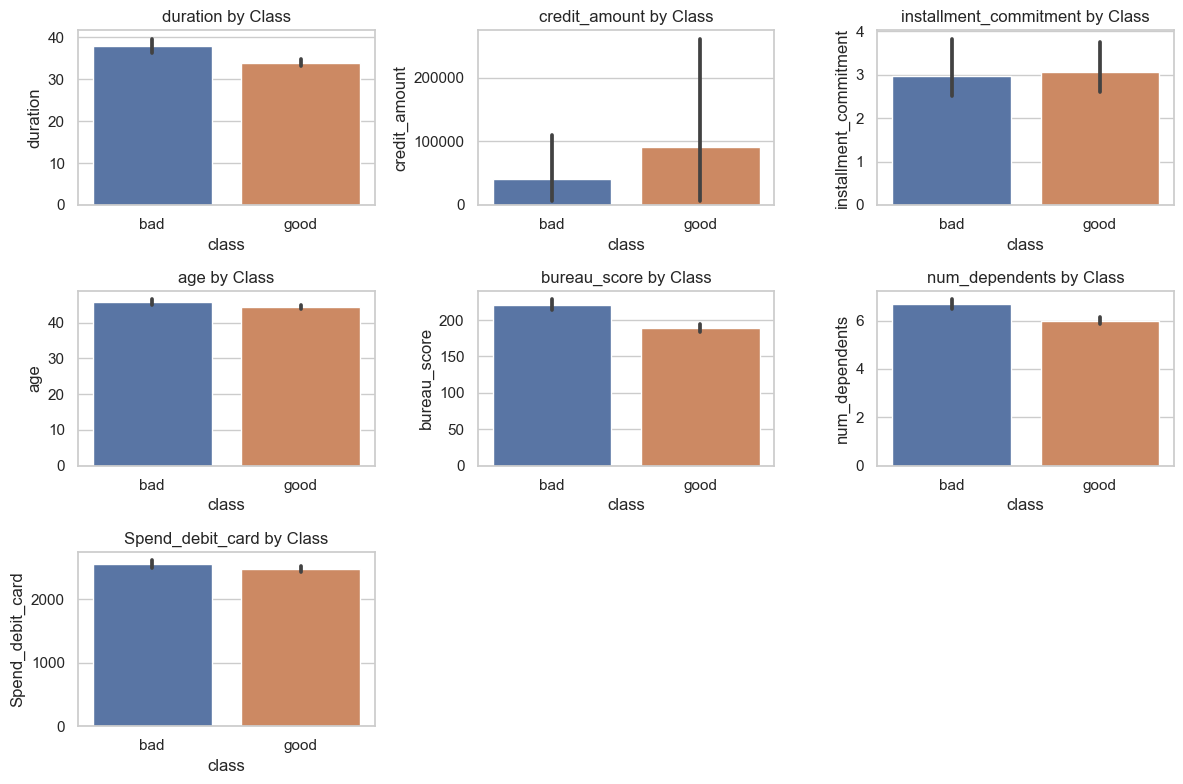

In [56]:
grouped_data = df.groupby('class').mean()

numerical_features = ['duration', 'credit_amount', 'installment_commitment', 'age', 'bureau_score', 'num_dependents', 'Spend_debit_card']
plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 3, numerical_features.index(feature) + 1)
    sns.barplot(data=df, x='class', y=feature)
    plt.title(f'{feature} by Class')
plt.tight_layout()
plt.show()

In [55]:
grouped_data

,duration,credit_amount,installment_commitment,residence_since,age,bureau_score,num_dependents,Spend_debit_card
class,,,,,,,,
bad,37.866739,41071.975081,2.965872,2.527627,45.734020,221.126761,6.676598,2553.570964
good,33.922285,91266.893571,3.060861,2.562110,44.408864,188.570537,5.994382,2481.078340


### Duration:
- The average duration of credit for the 'bad' class is approximately 37.87 months, while for the 'good' class, it is approximately 33.92 months.
- The 'bad' class tends to have slightly longer credit durations compared to the 'good' class.

### Credit_amount:
- The average credit amount for the 'bad' class is approximately 41071.98, whereas for the 'good' class, it is significantly higher at approximately 91266.89.
- Customers in the 'good' class tend to have higher credit amounts compared to the 'bad' class.

### Installment_commitment:
- The average installment commitment for the 'bad' class is approximately 2.97, and for the 'good' class, it is approximately 3.06.
- There is a slight difference in the installment commitments between the two classes.

### Residence_since:
- The average residence duration for the 'bad' class is approximately 2.53 years, and for the 'good' class, it is approximately 2.56 years.
- The difference in residence duration between the two classes is minimal.

### Age:
- The average age of customers in the 'bad' class is approximately 45.73 years, and for the 'good' class, it is approximately 44.41 years.
- Customers in the 'bad' class tend to be slightly older compared to the 'good' class.

### Bureau_score:
- The average bureau score for the 'bad' class is approximately 221.13, whereas for the 'good' class, it is approximately 188.57.
- Customers in the 'good' class tend to have higher bureau scores compared to the 'bad' class.

### Num_dependents:
- The average number of dependents for the 'bad' class is approximately 6.68, and for the 'good' class, it is approximately 5.99.
- The difference in the number of dependents between the two classes is moderate.

### Spend_debit_card:
- The average spending using a debit card for the 'bad' class is approximately 2553.57, and for the 'good' class, it is approximately 2481.08.
- The difference in spending using a debit card between the two classes is minimal.

# Outliers detection Using the Z-scores

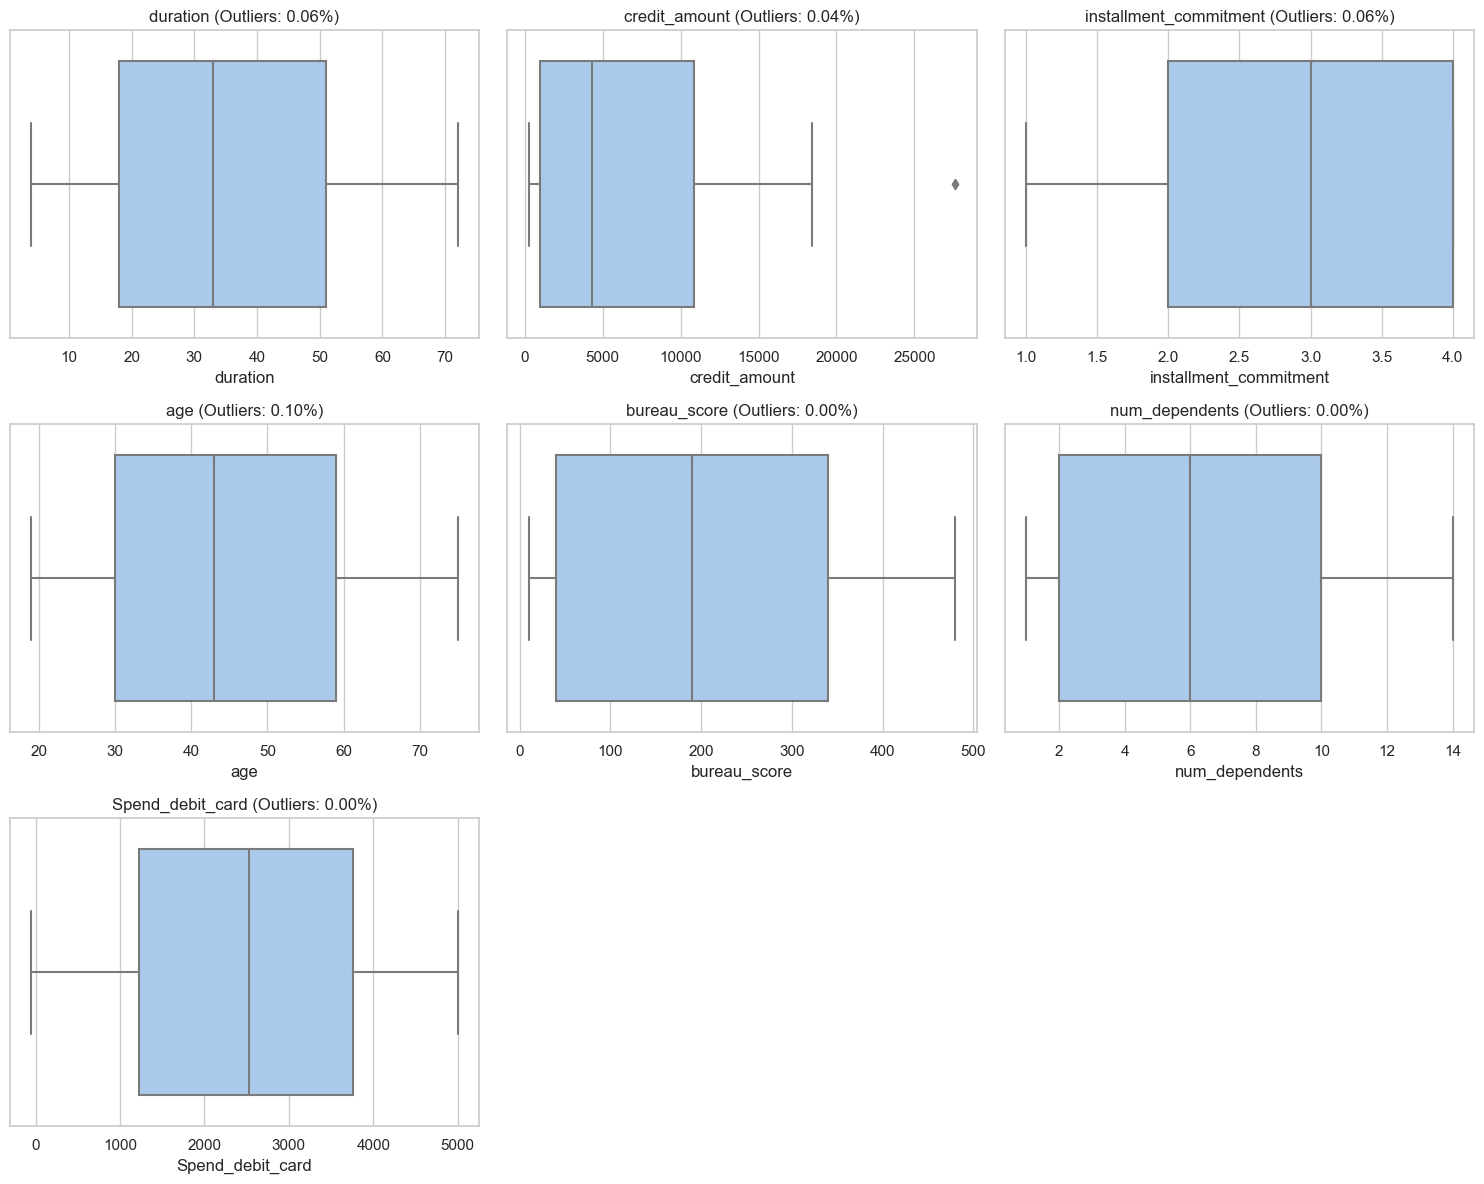

Percentage of outliers in 'duration': 0.06%
Percentage of outliers in 'credit_amount': 0.04%
Percentage of outliers in 'installment_commitment': 0.06%
Percentage of outliers in 'age': 0.10%
Percentage of outliers in 'bureau_score': 0.00%
Percentage of outliers in 'num_dependents': 0.00%
Percentage of outliers in 'Spend_debit_card': 0.00%


In [60]:
percentage_outliers = {}
outlier_threshold = 3  

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    z_scores = (df[feature] - df[feature].mean()) / df[feature].std()
    outliers = abs(z_scores) > outlier_threshold
    percentage_outliers[feature] = (outliers.sum() / len(df)) * 100
    sns.boxplot(data=df[~outliers], x=feature, palette='pastel')
    plt.title(f"{feature} (Outliers: {percentage_outliers[feature]:.2f}%)")
    plt.xlabel(feature, fontsize=12)
plt.tight_layout()
plt.show()
for feature, percentage in percentage_outliers.items():
    print(f"Percentage of outliers in '{feature}': {percentage:.2f}%")

- Since the percentage of outliers is extremely low (close to 0%) for 'bureau_score', 'num_dependents', and 'Spend_debit_card', it indicates that there are very few or no extreme values in these features compared to the total number of data points.

- For 'duration', 'credit_amount', 'installment_commitment', and 'age', the percentage of outliers is still very low (less than 0.1%), suggesting that there are only a few extreme values in these features.

- Based on these results, it may not be necessary to treat the outliers but based model performance we could may be treat them but right now its not nescessary

# Correlation analysis

In [64]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoder = LabelEncoder()
for col in categorical_features:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

In [65]:
correlation_matrix = df_encoded.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                        checking_status  duration  credit_history   purpose  \
checking_status                1.000000 -0.011275       -0.021259  0.002572   
duration                      -0.011275  1.000000        0.006646 -0.029395   
credit_history                -0.021259  0.006646        1.000000 -0.015952   
purpose                        0.002572 -0.029395       -0.015952  1.000000   
credit_amount                 -0.009795  0.009652       -0.009891 -0.022916   
savings_status                 0.011519 -0.044112       -0.004912  0.077265   
employment                    -0.012322  0.024486       -0.022103  0.004894   
installment_commitment        -0.008787  0.004165       -0.012573 -0.023547   
personal_status                0.017323 -0.011764       -0.005447  0.019635   
other_parties                 -0.019423 -0.103907        0.007542  0.036935   
residence_since                0.008977 -0.024126       -0.008991  0.019656   
property_magnitude            -0

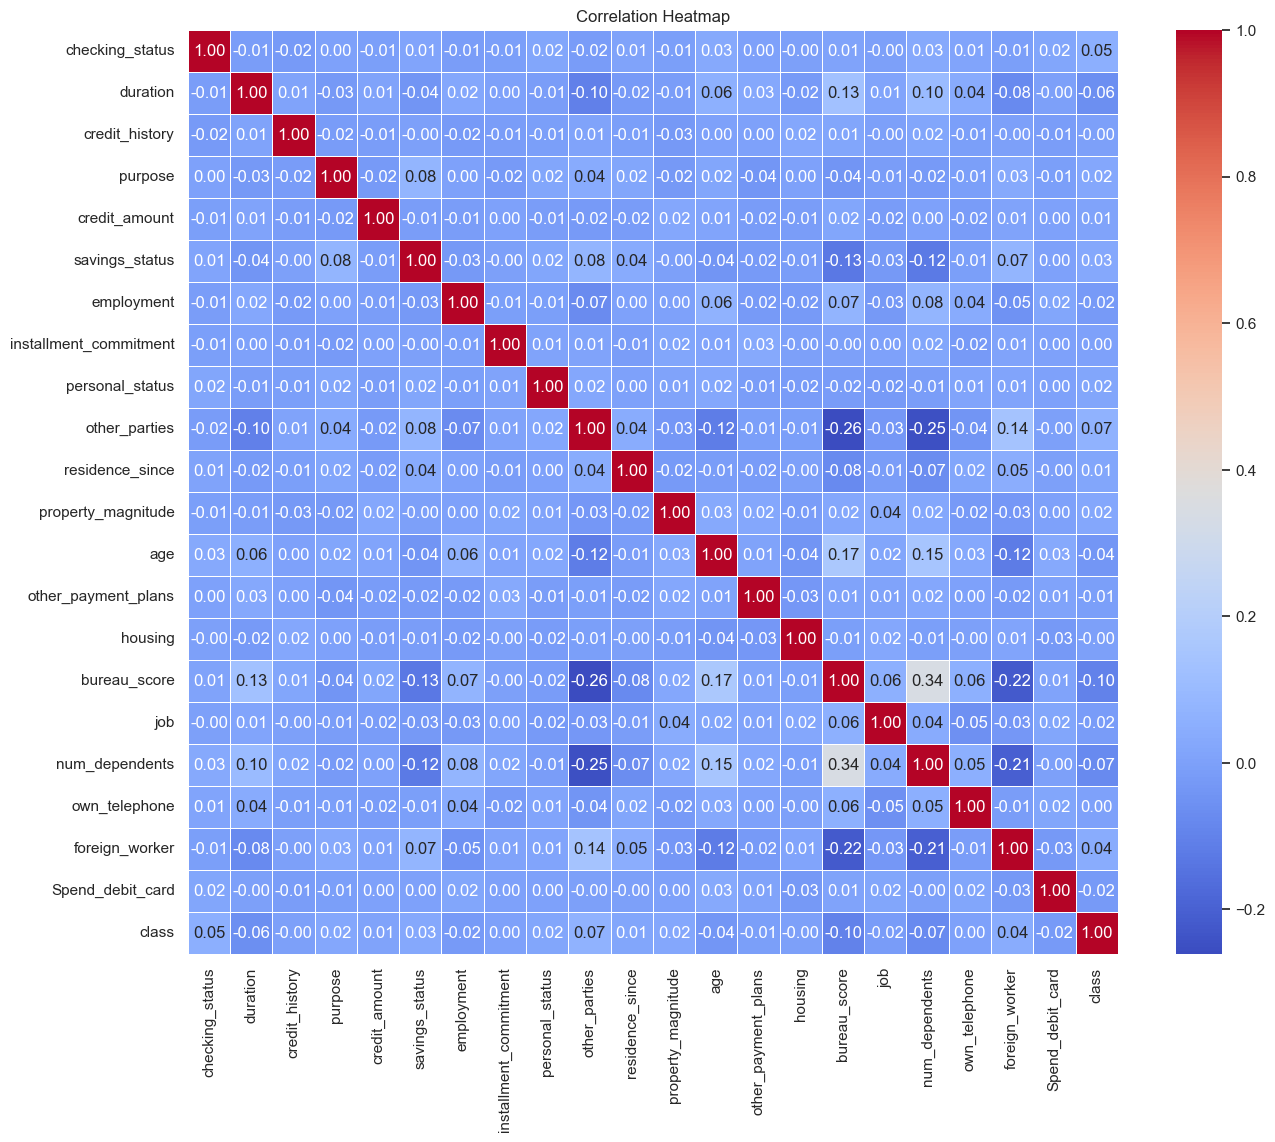

In [66]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

- The 'checking_status' and 'class' have a positive correlation, indicating that customers with higher checking status are more likely to be profitable credit card holders.'duration' and 'class' have a negative correlation, suggesting that longer credit durations may be associated with less profitability.
- The 'bureau_score' and 'class' have a negative correlation, implying that a higher bureau score may indicate a more profitable customer.
- Other correlations indicate weak relationships.

# Clustering analysis

In [67]:
dependent_variable = df['class']
clustering_features = df.drop('class', axis=1)

label_encoder = LabelEncoder()
for col in clustering_features.select_dtypes(include='object').columns:
    clustering_features[col] = label_encoder.fit_transform(clustering_features[col])

In [68]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

In [74]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'bureau_score', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'Spend_debit_card', 'class'],
      dtype='object')

In [76]:
clust_data=pd.DataFrame(scaled_features,columns=['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'bureau_score', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'Spend_debit_card'])
clust_data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card
0,-0.582791,-0.532242,-0.856759,-1.414833,-0.018336,0.286637,1.485184,-0.112421,-0.818088,-1.378837,-1.384426,-0.427454,-1.368867,1.336210,-1.328082,-0.582501,0.507692,0.623071,1.022835,-1.187645,0.653353
1,-0.582791,0.801278,0.579468,-1.414833,-0.018269,0.286637,-1.349083,-0.056935,-0.818088,-1.378837,-0.490963,1.316199,-1.189486,-1.314167,-1.328082,1.284668,0.507692,-0.733281,-0.977675,0.842002,-0.998113
2,-0.582791,1.191576,-0.856759,-1.414833,-0.018366,0.286637,-1.349083,-0.056935,-0.818088,-1.378837,-0.490963,-0.427454,-1.249280,-1.314167,-1.328082,-0.067420,0.507692,1.527306,-0.977675,-1.187645,-1.470645
3,-0.582791,-0.076894,0.579468,-1.414833,-0.018345,0.286637,-0.640516,-0.056935,-0.818088,-1.378837,1.295964,-0.427454,-0.890519,0.011021,-1.328082,0.769587,-0.410920,-1.185398,-0.977675,0.842002,-0.828522
4,-0.582791,1.028952,-0.138646,-1.414833,-0.018318,0.286637,-1.349083,-0.056935,-0.818088,-1.378837,0.402501,0.444373,-0.890519,1.336210,-1.328082,-0.196190,1.426304,-0.507222,1.022835,-1.187645,-1.020680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,1.140331,-0.597292,-1.574873,1.673594,-0.018332,2.075902,0.068050,0.054035,1.273732,1.011936,-1.384426,-0.427454,0.125969,0.011021,1.260922,0.383276,0.507692,-0.959339,-0.977675,-1.187645,-1.371489
5046,1.140331,0.215830,-1.574873,1.673594,-0.018088,-0.607996,1.485184,0.054035,-0.818088,1.011936,-0.490963,1.316199,-0.292585,1.336210,1.260922,0.833972,-0.410920,-0.281163,1.022835,-1.187645,-0.520111
5047,1.140331,0.215830,-0.856759,1.673594,-0.014176,-0.607996,-0.640516,-0.112421,1.273732,1.011936,1.295964,0.444373,0.006382,0.011021,-0.033580,1.606594,1.426304,1.753365,1.022835,-1.187645,0.600698
5048,1.140331,-0.694867,1.297582,1.673594,-0.014691,0.286637,-1.349083,-0.056935,1.273732,1.011936,-0.490963,0.444373,-1.189486,-1.314167,1.260922,0.576432,0.507692,-0.281163,1.022835,-1.187645,0.726524


In [70]:
from sklearn.cluster import KMeans

In [73]:
def plot_inertia(data, no_of_k):
    inertia = []
    for k in range(1, no_of_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    plt.plot(range(1, no_of_k+1), inertia, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-cluster Sum of Squares (Inertia)')
    plt.title('Elbow Method to Determine Optimal K')
    plt.show()

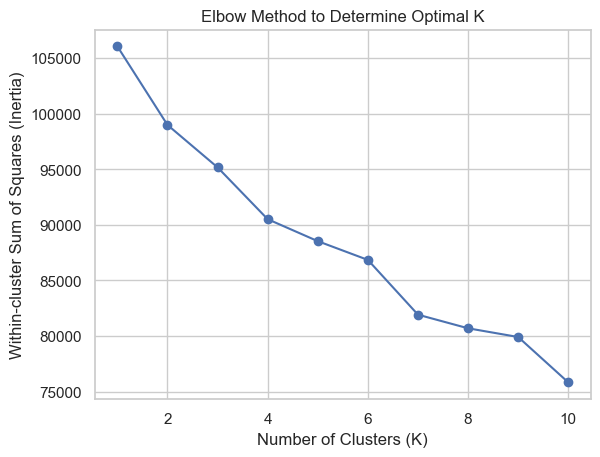

In [77]:
plot_inertia(clust_data,10)

In [79]:
from sklearn.metrics import silhouette_score

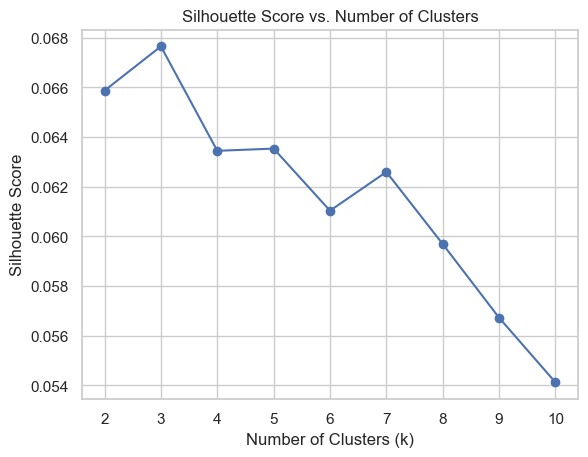

In [81]:
silhouette_scores = [] 
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(clust_data)
    silhouette_avg = silhouette_score(clust_data, clusters)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

- Given that silhouette scores are in the range of 0.054 to 0.068, it suggests that the clusters may not be well-defined and there might be some overlap between them

In [82]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(clust_data)

KMeans(n_clusters=3, random_state=42)

In [93]:
df_clust=df.drop(columns=['class'])
df_clust['clusters']=kmeans.labels_
df_clust

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,clusters
0,<0,19.0,critical/other existing credit,business,640.0,<100,unemployed,1,male div/sep,co applicant,1,life insurance,22,stores,for free,110,unemp/unskilled non res,9.0,yes,no,3463,0
1,<0,60.0,existing paid,business,903.0,<100,1<=X<4,2,male div/sep,co applicant,2,real estate,25,bank,for free,400,unemp/unskilled non res,3.0,none,yes,1048,1
2,<0,72.0,critical/other existing credit,business,523.0,<100,1<=X<4,2,male div/sep,co applicant,2,life insurance,24,bank,for free,190,unemp/unskilled non res,13.0,none,no,357,0
3,<0,33.0,existing paid,business,605.0,<100,4<=X<7,2,male div/sep,co applicant,4,life insurance,30,none,for free,320,skilled,1.0,none,yes,1296,1
4,<0,67.0,delayed previously,business,709.0,<100,1<=X<4,2,male div/sep,co applicant,3,no known property,30,stores,for free,170,unskilled resident,4.0,yes,no,1015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,no checking,17.0,all paid,used car,656.0,no known savings,<1,4,male single,none,1,life insurance,47,none,rent,260,unemp/unskilled non res,2.0,none,no,502,0
5046,no checking,42.0,all paid,used car,1618.0,500<=X<1000,unemployed,4,male div/sep,none,2,real estate,40,stores,rent,330,skilled,5.0,yes,no,1747,0
5047,no checking,42.0,critical/other existing credit,used car,17037.0,500<=X<1000,4<=X<7,1,male single,none,4,no known property,45,none,own,450,unskilled resident,14.0,yes,no,3386,0
5048,no checking,14.0,no credits/all paid,used car,15007.0,<100,1<=X<4,2,male single,none,2,no known property,25,bank,rent,290,unemp/unskilled non res,5.0,yes,no,3570,0


In [101]:
df_clust

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,clusters,class
0,<0,19.0,critical/other existing credit,business,640.0,<100,unemployed,1,male div/sep,co applicant,1,life insurance,22,stores,for free,110,unemp/unskilled non res,9.0,yes,no,3463,0,bad
1,<0,60.0,existing paid,business,903.0,<100,1<=X<4,2,male div/sep,co applicant,2,real estate,25,bank,for free,400,unemp/unskilled non res,3.0,none,yes,1048,1,good
2,<0,72.0,critical/other existing credit,business,523.0,<100,1<=X<4,2,male div/sep,co applicant,2,life insurance,24,bank,for free,190,unemp/unskilled non res,13.0,none,no,357,0,bad
3,<0,33.0,existing paid,business,605.0,<100,4<=X<7,2,male div/sep,co applicant,4,life insurance,30,none,for free,320,skilled,1.0,none,yes,1296,1,bad
4,<0,67.0,delayed previously,business,709.0,<100,1<=X<4,2,male div/sep,co applicant,3,no known property,30,stores,for free,170,unskilled resident,4.0,yes,no,1015,0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,no checking,17.0,all paid,used car,656.0,no known savings,<1,4,male single,none,1,life insurance,47,none,rent,260,unemp/unskilled non res,2.0,none,no,502,0,good
5046,no checking,42.0,all paid,used car,1618.0,500<=X<1000,unemployed,4,male div/sep,none,2,real estate,40,stores,rent,330,skilled,5.0,yes,no,1747,0,good
5047,no checking,42.0,critical/other existing credit,used car,17037.0,500<=X<1000,4<=X<7,1,male single,none,4,no known property,45,none,own,450,unskilled resident,14.0,yes,no,3386,0,good
5048,no checking,14.0,no credits/all paid,used car,15007.0,<100,1<=X<4,2,male single,none,2,no known property,25,bank,rent,290,unemp/unskilled non res,5.0,yes,no,3570,0,good


In [102]:
numerical_features

['duration',
 'credit_amount',
 'installment_commitment',
 'age',
 'bureau_score',
 'num_dependents',
 'Spend_debit_card']

# Analysis on clusters

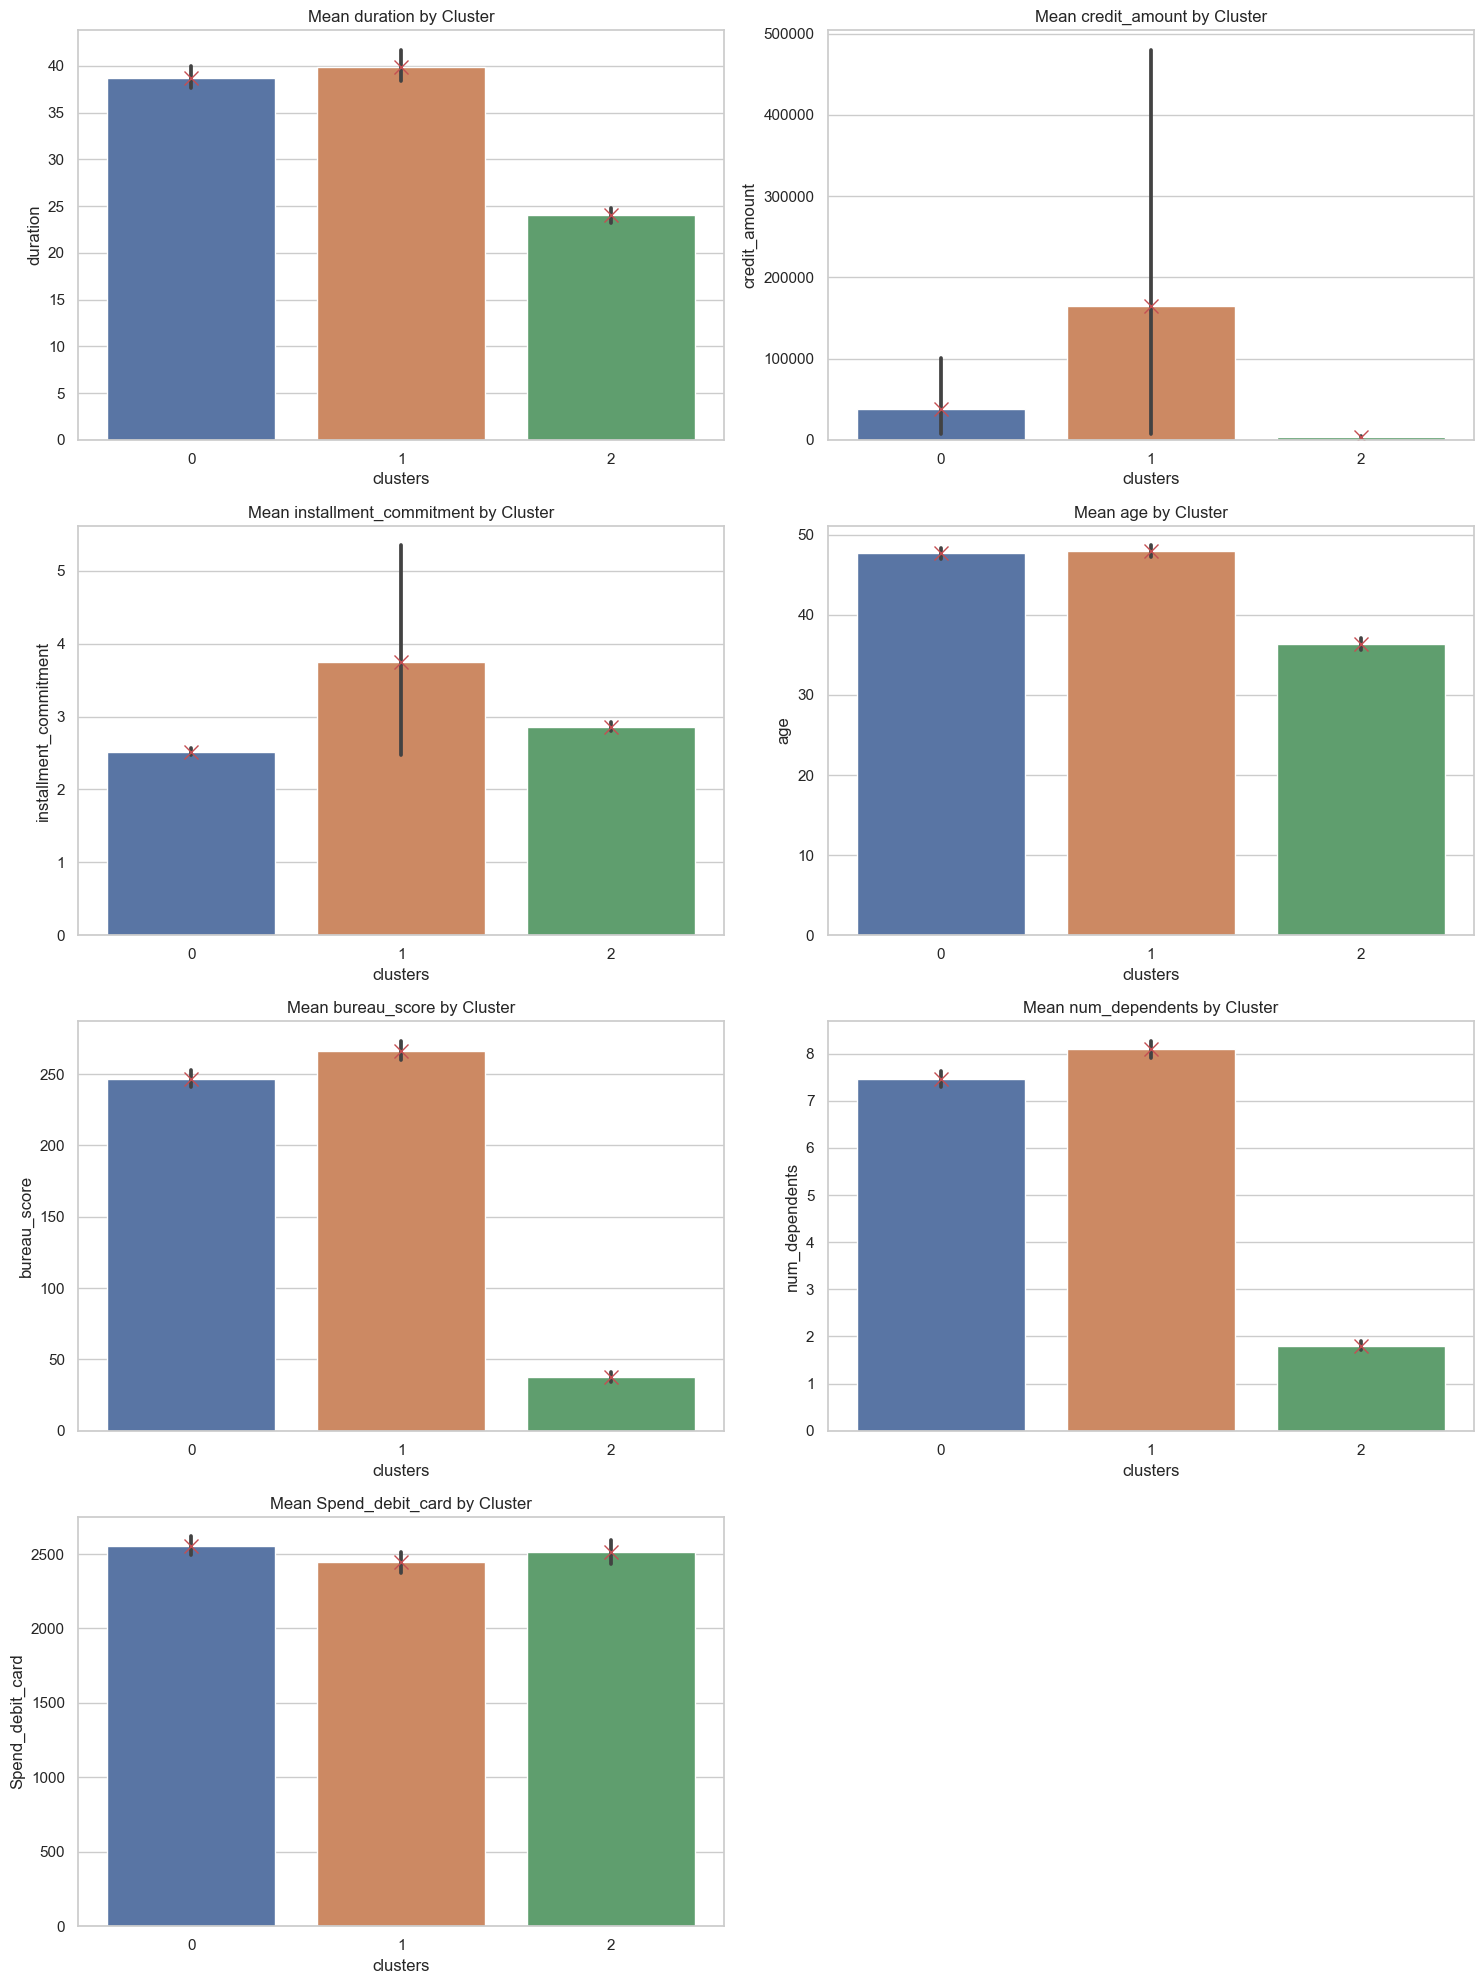

In [105]:
df_clust['class']=df['class']
cluster_means = df_clust.groupby('clusters').mean()
num_cols = 2
num_rows = (len(numerical_features) + 1) // num_cols
plt.figure(figsize=(15, 5 * num_rows))
for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.barplot(x='clusters', y=feature, data=df_clust)
    plt.title(f'Mean {feature} by Cluster')
    plt.plot(cluster_means.index, cluster_means[feature], 'rx', markersize=10)
plt.tight_layout()
plt.show()

In [106]:
cluster_means

,duration,credit_amount,installment_commitment,residence_since,age,bureau_score,num_dependents,Spend_debit_card
clusters,,,,,,,,
0,38.702358,38212.199411,2.516208,2.476424,47.703340,246.827112,7.470530,2555.386051
1,39.840647,164728.331986,3.748845,2.433603,47.925520,266.478060,8.088337,2446.737298
2,24.014821,4000.377535,2.859594,2.822153,36.333853,37.675507,1.803432,2513.847114


### Cluster 0:

- Customers in this group have average credit amounts and reasonable credit history.
- They are middle-aged individuals with a moderate number of dependents.
- They tend to spend an average amount using debit cards.

### Cluster 1:
- Customers in this group have high credit amounts and excellent credit history.
- They are slightly older than the average customer and have more dependents.
- They tend to spend more using debit cards compared to other clusters.

### Cluster 2:
- Customers in this group have low credit amounts and a relatively short credit history.
- They are young customers with fewer dependents.
- Their debit card spending is average, similar to other customers.

### summary
- Cluster 0: Average Credit Customers
- Cluster 1: High Creditworthiness Customers
- Cluster 2: Low Credit Customers

In [108]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

In [113]:
x=df.drop(columns=['class'])
y=df['class']

# Feature Scaling

In [114]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

# Split Data

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# First lets create a base model using differnent ml algoritms

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression

In [119]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 62.69%
Training Accuracy: 63.49%
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.04      0.07       611
           1       0.64      0.97      0.77      1056

    accuracy                           0.63      1667
   macro avg       0.52      0.50      0.42      1667
weighted avg       0.55      0.63      0.51      1667



# Random Forest 

In [120]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 61.19%
Training Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.12      0.18       611
           1       0.64      0.90      0.75      1056

    accuracy                           0.61      1667
   macro avg       0.52      0.51      0.46      1667
weighted avg       0.55      0.61      0.54      1667



# Support Vector Machines

In [124]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 63.35%
Training Accuracy: 63.49%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       611
           1       0.63      1.00      0.78      1056

    accuracy                           0.63      1667
   macro avg       0.32      0.50      0.39      1667
weighted avg       0.40      0.63      0.49      1667



# K-nearest neighbors

In [126]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
yhat = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 57.23%
Training Accuracy: 63.49%
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.28      0.32       611
           1       0.64      0.74      0.69      1056

    accuracy                           0.57      1667
   macro avg       0.51      0.51      0.51      1667
weighted avg       0.55      0.57      0.55      1667



- base models are built using ml algorithms such as logistic regression,knn,svm,random forest we could observe that precison,recall is well imporved for each model and accuracy is very poor,also there is overfitting problems in random forest model so further we could do some feature selection method

# Feature selection using chi2,RFE

- calculate p-values for each feature and then select the ones that have p-values below a certain significance level (e.g., 0.05).

In [139]:
import statsmodels.api as sm
target_column = 'class'
feature_columns = df.columns.drop(target_column)
df['intercept'] = 1
logit_model = sm.Logit(df[target_column], df[feature_columns])
result = logit_model.fit()
p_values = result.pvalues
significance_level = 0.05

Optimization terminated successfully.
         Current function value: 0.647019
         Iterations 5


In [140]:
selected_features = p_values[p_values < significance_level]
top_10_features = selected_features.sort_values().index[:10]
df.drop('intercept', axis=1, inplace=True)
selected_df = df[top_10_features.append(pd.Index([target_column]))]
print("Top 10 Selected Features:")
print(selected_df.head())

Top 10 Selected Features:
   checking_status  bureau_score  other_parties  property_magnitude  duration  \
0                1           110              0                   1      19.0   
1                1           400              0                   3      60.0   
2                1           190              0                   1      72.0   
3                1           320              0                   1      33.0   
4                1           170              0                   2      67.0   

   class  
0      0  
1      1  
2      0  
3      0  
4      0  


# Based on chi2

In [146]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [163]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [164]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
k_best_selector = SelectKBest(score_func=chi2, k=10)
k_best_selector.fit(X_train_scaled, y_train)
selected_features_indices = k_best_selector.get_support(indices=True)
selected_features = X_train.columns[selected_features_indices]

In [168]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
print("Top 10 Selected Features:")
print(selected_features)

Top 10 Selected Features:
Index(['checking_status', 'purpose', 'savings_status', 'other_parties',
       'property_magnitude', 'other_payment_plans', 'bureau_score', 'job',
       'num_dependents', 'foreign_worker'],
      dtype='object')


# Based on RFE

In [152]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [153]:
model = LogisticRegression() 
num_features_to_select = 10 
rfe_selector = RFE(estimator=model, n_features_to_select=num_features_to_select)
rfe_selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [154]:
selected_features_indices = rfe_selector.get_support(indices=True)
selected_features = X_train.columns[selected_features_indices]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [155]:
print("Top 10 Selected Features:")
print(selected_features)

Top 10 Selected Features:
Index(['checking_status', 'savings_status', 'personal_status', 'other_parties',
       'property_magnitude', 'other_payment_plans', 'job', 'num_dependents',
       'own_telephone', 'foreign_worker'],
      dtype='object')


# We can use common features between the chi2 and rfe method 

In [172]:
from scipy.stats.stats import pearsonr
feature_cols=df.drop(columns=['class'])
for c in feature_cols:
    _,pval=pearsonr(df[c],y)
    print('column:',c,' - p-value',round(pval,3))

column: checking_status  - p-value 0.0
column: duration  - p-value 0.0
column: credit_history  - p-value 0.84
column: purpose  - p-value 0.098
column: credit_amount  - p-value 0.663
column: savings_status  - p-value 0.043
column: employment  - p-value 0.129
column: installment_commitment  - p-value 0.857
column: personal_status  - p-value 0.235
column: other_parties  - p-value 0.0
column: residence_since  - p-value 0.292
column: property_magnitude  - p-value 0.161
column: age  - p-value 0.007
column: other_payment_plans  - p-value 0.552
column: housing  - p-value 0.817
column: bureau_score  - p-value 0.0
column: job  - p-value 0.205
column: num_dependents  - p-value 0.0
column: own_telephone  - p-value 0.763
column: foreign_worker  - p-value 0.003
column: Spend_debit_card  - p-value 0.09


In [188]:
feature_cols=['checking_status','savings_status', 'other_parties','age','bureau_score','num_dependents','foreign_worker']
X = df[feature_cols]
scores,cpvalues = chi2(X,y)
p_df = pd.DataFrame()
p_df["features"] = feature_cols
p_df["p_val"] = cpvalues.round(3)
p_df

,features,p_val
0,checking_status,0.001
1,savings_status,0.080
2,other_parties,0.000
3,age,0.000
4,bureau_score,0.000
5,num_dependents,0.000
6,foreign_worker,0.055


- We considering the features which are commonly occured in feature selection method

In [173]:
common_features=['checking_status','savings_status', 'other_parties','age','bureau_score','num_dependents','foreign_worker']
X = df[common_features]
y = df['class']

# Feature scaling

In [174]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression

In [176]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 62.97%
Training Accuracy: 63.45%
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.01      0.03       554
           1       0.63      0.98      0.77       961

    accuracy                           0.63      1515
   macro avg       0.49      0.50      0.40      1515
weighted avg       0.53      0.63      0.50      1515



# Random Forest

In [182]:
model = RandomForestClassifier(max_depth=5,random_state=42)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 63.63%
Training Accuracy: 63.99%
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.01      0.02       554
           1       0.64      1.00      0.78       961

    accuracy                           0.64      1515
   macro avg       0.68      0.50      0.40      1515
weighted avg       0.66      0.64      0.50      1515



# Support vector machines

In [185]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 63.30%
Training Accuracy: 63.93%
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.01      0.02       554
           1       0.63      0.99      0.77       961

    accuracy                           0.63      1515
   macro avg       0.53      0.50      0.40      1515
weighted avg       0.55      0.63      0.50      1515



- after doing the feature selection precision&recall not much improved so we could try upsampling the dataset since the dataset is imbalanced by 1:2 ratio

- Based on the feature selection methods used (chi2 and RFE) and the common features obtained, the following features are identified as important for the classification models:

- checking_status
- savings_status
- other_parties
- property_magnitude
- other_payment_plans
- job
- num_dependents
- foreign_worker

# After feature sampling

# Feature upsampling with smote method

In [192]:
from imblearn.over_sampling import SMOTE

In [189]:
common_features = ['checking_status', 'savings_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'job', 'num_dependents', 'foreign_worker']
X = df[common_features]
y = df['class']

In [190]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [193]:
smote = SMOTE(random_state=42)
X_upsampled, y_upsampled = smote.fit_resample(X_scaled, y)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

# Logistic regression

In [195]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 54.52%
Training Accuracy: 53.47%
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.52      0.53       648
           1       0.54      0.57      0.56       634

    accuracy                           0.55      1282
   macro avg       0.55      0.55      0.55      1282
weighted avg       0.55      0.55      0.54      1282



# Random Forest

In [196]:
model = RandomForestClassifier(max_depth=5,random_state=42)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 59.75%
Training Accuracy: 64.67%
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.68      0.63       648
           1       0.61      0.51      0.56       634

    accuracy                           0.60      1282
   macro avg       0.60      0.60      0.59      1282
weighted avg       0.60      0.60      0.59      1282



# Support vector machines

In [197]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 57.41%
Training Accuracy: 63.46%
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       648
           1       0.58      0.48      0.53       634

    accuracy                           0.57      1282
   macro avg       0.58      0.57      0.57      1282
weighted avg       0.58      0.57      0.57      1282



# knn

In [198]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
yhat = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 62.40%
Training Accuracy: 63.46%
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       648
           1       0.64      0.56      0.60       634

    accuracy                           0.62      1282
   macro avg       0.63      0.62      0.62      1282
weighted avg       0.63      0.62      0.62      1282



- After upsampling we could observe that the precision and recall are much improved,so now we try to eliminate noisy elements using the smotenn method will check for model performance

# Upsampling using Smoteenn method

In [216]:
from imblearn.combine import SMOTEENN

In [217]:
common_features = ['checking_status', 'savings_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'job', 'num_dependents', 'foreign_worker']
X = df[common_features]
y = df['class'] 

In [218]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [219]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_scaled, y)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Logistic Regression

In [221]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 73.18%
Training Accuracy: 67.19%
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       407
           1       0.69      0.54      0.61       253

    accuracy                           0.73       660
   macro avg       0.72      0.70      0.70       660
weighted avg       0.73      0.73      0.72       660



# Random Forest 

In [225]:
model = RandomForestClassifier(n_estimators=100,max_depth=7,random_state=42)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 80.91%
Training Accuracy: 85.90%
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       407
           1       0.90      0.57      0.69       253

    accuracy                           0.81       660
   macro avg       0.84      0.76      0.78       660
weighted avg       0.83      0.81      0.80       660



# Support vector machines

In [230]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 78.48%
Training Accuracy: 81.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       407
           1       0.83      0.55      0.66       253

    accuracy                           0.78       660
   macro avg       0.80      0.74      0.75       660
weighted avg       0.79      0.78      0.77       660



# K-nearest neighbors

In [237]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
yhat = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 80.15%
Training Accuracy: 81.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       407
           1       0.84      0.60      0.70       253

    accuracy                           0.80       660
   macro avg       0.81      0.76      0.77       660
weighted avg       0.81      0.80      0.79       660



# Naive Bayes

In [259]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))
train_accuracy = accuracy_score(y_train, nb_model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Test Accuracy: 71.36%
Training Accuracy: 68.10%
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       407
           1       0.65      0.55      0.59       253

    accuracy                           0.71       660
   macro avg       0.70      0.68      0.69       660
weighted avg       0.71      0.71      0.71       660



# Decision Tree

In [238]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))
train_accuracy = accuracy_score(y_train, dt_model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Test Accuracy: 77.58%
Training Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       407
           1       0.69      0.74      0.72       253

    accuracy                           0.78       660
   macro avg       0.76      0.77      0.77       660
weighted avg       0.78      0.78      0.78       660



# XGboost

In [240]:
from xgboost import XGBClassifier

In [257]:
xgb_model = XGBClassifier(n_estimators=500,learning_rate=0.01,max_depth=5)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))
train_accuracy = accuracy_score(y_train, xgb_model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Test Accuracy: 81.21%
Training Accuracy: 86.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       407
           1       0.82      0.65      0.73       253

    accuracy                           0.81       660
   macro avg       0.81      0.78      0.79       660
weighted avg       0.81      0.81      0.81       660



# Adaboost

In [242]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))
train_accuracy = accuracy_score(y_train, ada_model.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Test Accuracy: 74.55%
Training Accuracy: 74.92%
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       407
           1       0.68      0.63      0.66       253

    accuracy                           0.75       660
   macro avg       0.73      0.72      0.73       660
weighted avg       0.74      0.75      0.74       660



- We can see much improved accuracy,also precison and recall are well improved,so by using the feature selection and upsampling we able to improve the model performance
- Also the overfitting is reduced for all the models which we have build

- Summary of the classification models after feature selection and upsampling using SMOTEEN:

- 1. XGBoost:
   - Test Accuracy: 81%
   - Training Accuracy: 86%
   - XGBoost performed well after feature selection and upsampling. It achieved 80% accuracy on the test set and showed good generalization with 86% training accuracy but there is slight overfitting.

- 2. Random Forest:
   - Test Accuracy: 80.9%
   - Training Accuracy: 85.9%
   - Random Forest also performed well, achieving 81% accuracy on the test set. It showed similar performance on both training and test data.
   - slight overfitting as well
    
- 3. K-Nearest Neighbors (KNN):
   - Test Accuracy: 80%
   - Training Accuracy: 81%
   - KNN performed on par with Random Forest, achieving 81% accuracy on the test set. It also showed consistent performance between training and test data.

- 4. Support Vector Machine (SVM):
   - Test Accuracy: 78%
   - Training Accuracy: 81.22%
   - SVM achieved 78% accuracy on the test set. It showed slight overfitting, as the training accuracy was higher than the test accuracy.

- Overall, all four models showed good performance after feature selection and upsampling using SMOTEEN. XGBoost and Random Forest achieved the highest test accuracy of 80% and 81%, respectively. KNN and SVM also performed well, achieving 81% accuracy on the test set. 

# Build model using pca components

In [261]:
from sklearn.decomposition import PCA

In [285]:
x=df.drop(columns=['class'])
y=df['class']

In [286]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [288]:
pca = PCA(n_components=3) 
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2','Principal Component 3'])
pca_df['class'] = y

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [289]:
pca_df

,Principal Component 1,Principal Component 2,Principal Component 3,class
0,1.663135,0.388656,0.070469,0
1,-0.122279,0.817407,0.483785,1
2,1.988897,-0.707509,0.915611,0
3,-0.614075,-0.279846,0.473842,0
4,1.230227,1.624680,-0.133591,0
...,...,...,...,...
5045,-1.103411,-0.120798,-1.508937,1
5046,0.331187,0.877147,-1.469566,1
5047,1.594509,0.539704,-0.874100,1
5048,-0.128774,-0.148044,-0.714256,1


# Logistic Regression

In [290]:
model = LogisticRegression()
model.fit(X_train1, y_train1)
yhat = model.predict(X_test1)
accuracy = accuracy_score(y_test1, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train1, model.predict(X_train1))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test1, yhat))

Test Accuracy: 63.27%
Training Accuracy: 63.39%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       369
           1       0.63      1.00      0.78       641

    accuracy                           0.63      1010
   macro avg       0.32      0.50      0.39      1010
weighted avg       0.40      0.63      0.49      1010



# Random forest

In [291]:
model = RandomForestClassifier(n_estimators=100,max_depth=7,random_state=42)
model.fit(X_train1, y_train1)
yhat = model.predict(X_test1)
accuracy = accuracy_score(y_test1, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train1, model.predict(X_train1))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test1, yhat))

Test Accuracy: 63.17%
Training Accuracy: 64.78%
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.01      0.02       369
           1       0.63      0.99      0.77       641

    accuracy                           0.63      1010
   macro avg       0.48      0.50      0.39      1010
weighted avg       0.52      0.63      0.50      1010



# Support vector machines

In [292]:
model = SVC(kernel='rbf')
model.fit(X_train1, y_train1)
yhat = model.predict(X_test1)
accuracy = accuracy_score(y_test1, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train1, model.predict(X_train1))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test1, yhat))

Test Accuracy: 63.47%
Training Accuracy: 63.44%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       369
           1       0.63      1.00      0.78       641

    accuracy                           0.63      1010
   macro avg       0.32      0.50      0.39      1010
weighted avg       0.40      0.63      0.49      1010



In [293]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train1, y_train1)
yhat = knn_model.predict(X_test1)
accuracy = accuracy_score(y_test1, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train1, model.predict(X_train1))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test1, yhat))

Test Accuracy: 52.97%
Training Accuracy: 63.44%
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.28      0.30       369
           1       0.62      0.67      0.65       641

    accuracy                           0.53      1010
   macro avg       0.47      0.48      0.47      1010
weighted avg       0.51      0.53      0.52      1010



- After using the first three pca components the accuracy is low
- precison and recall is not balanced
- overfitting problem is not seen in models as well